In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6) # bütün notebook ta görseller aynı boyutta olacak

import warnings
warnings.filterwarnings("ignore") # verilen uyarının göz ardı edilmesi için 

## Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


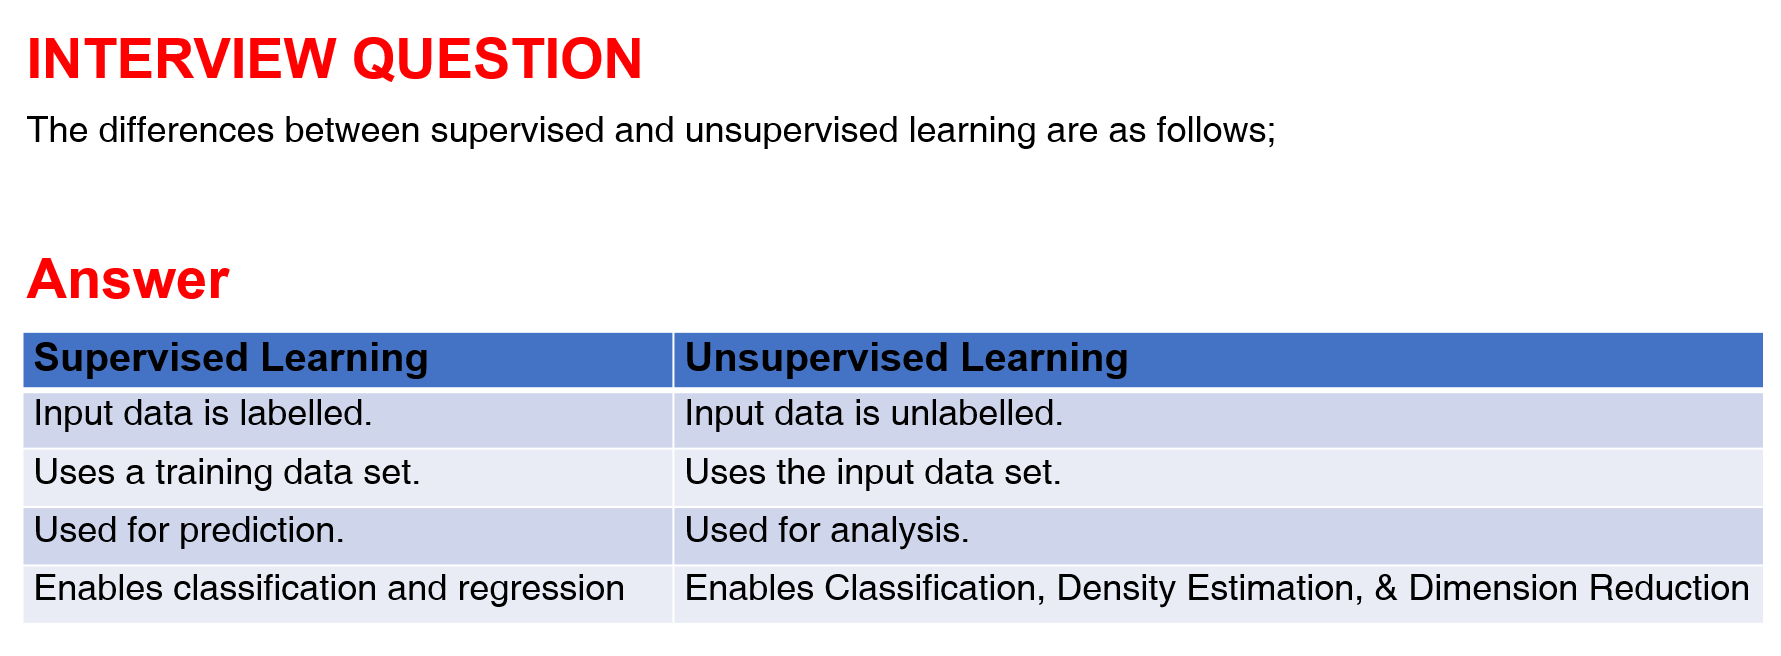

Satır = Gözlem = Row = Sample = Observation

Bağımsız değişken = Attribute = Estimator = Independent Variable = Feature(s)

Bağımlı değişken = Dependent Variable = Output = Label = Target

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.sample(5)

,TV,radio,newspaper,sales
154,187.8,21.1,9.5,15.6
6,57.5,32.8,23.5,11.8
71,109.8,14.3,31.7,12.4
40,202.5,22.3,31.6,16.6
84,213.5,43.0,33.8,21.7


In [6]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [7]:
df.describe().T # statistical summary.

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


TV, radio, newspaper = Features

sales = Target

regression etki analizi, correlation da iliski analizi. target must have a linear relation with freatures. there has to be correlation in order to talk about regression. if there is no correlation, there is no regression.

features must not have high correlation among themselves. otherwise we'll face multicolinearity problem.

our data mus have homogeneous distribution to talk about regression, we can check with heatmap and scatterplot.


In [8]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


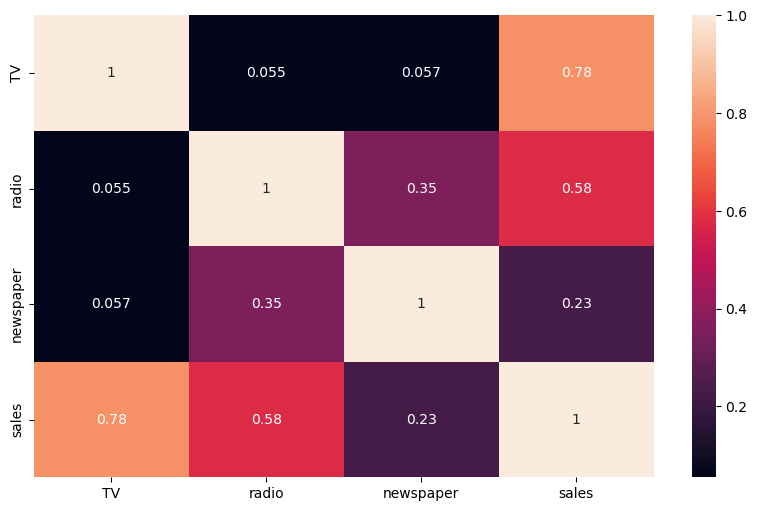

In [9]:
sns.heatmap(df.corr(), annot = True);

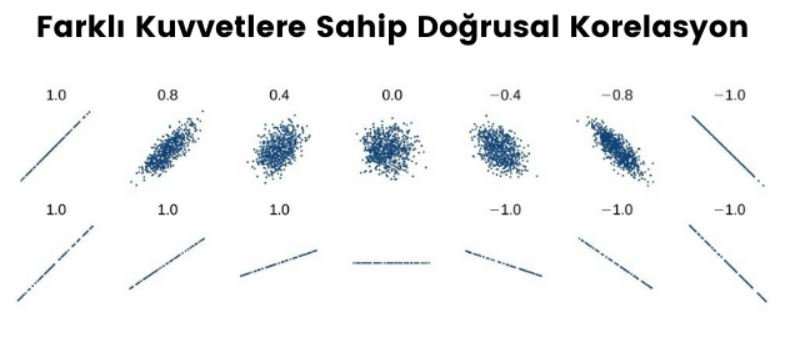

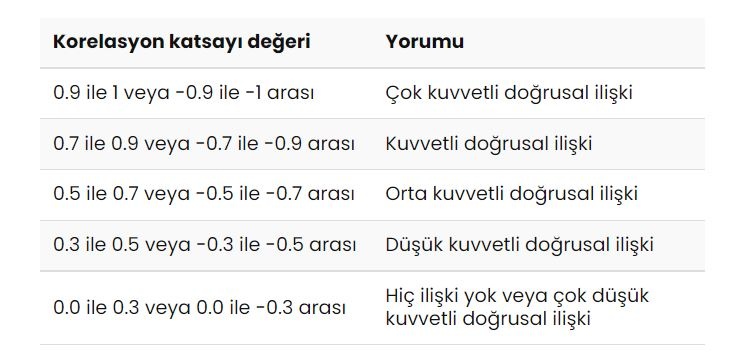

In [10]:
df["total_spend"] = df.TV + df.radio + df.newspaper
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [11]:
df = df.iloc[:, [0, 1, 2, 4, 3]]
df.head(1)

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1


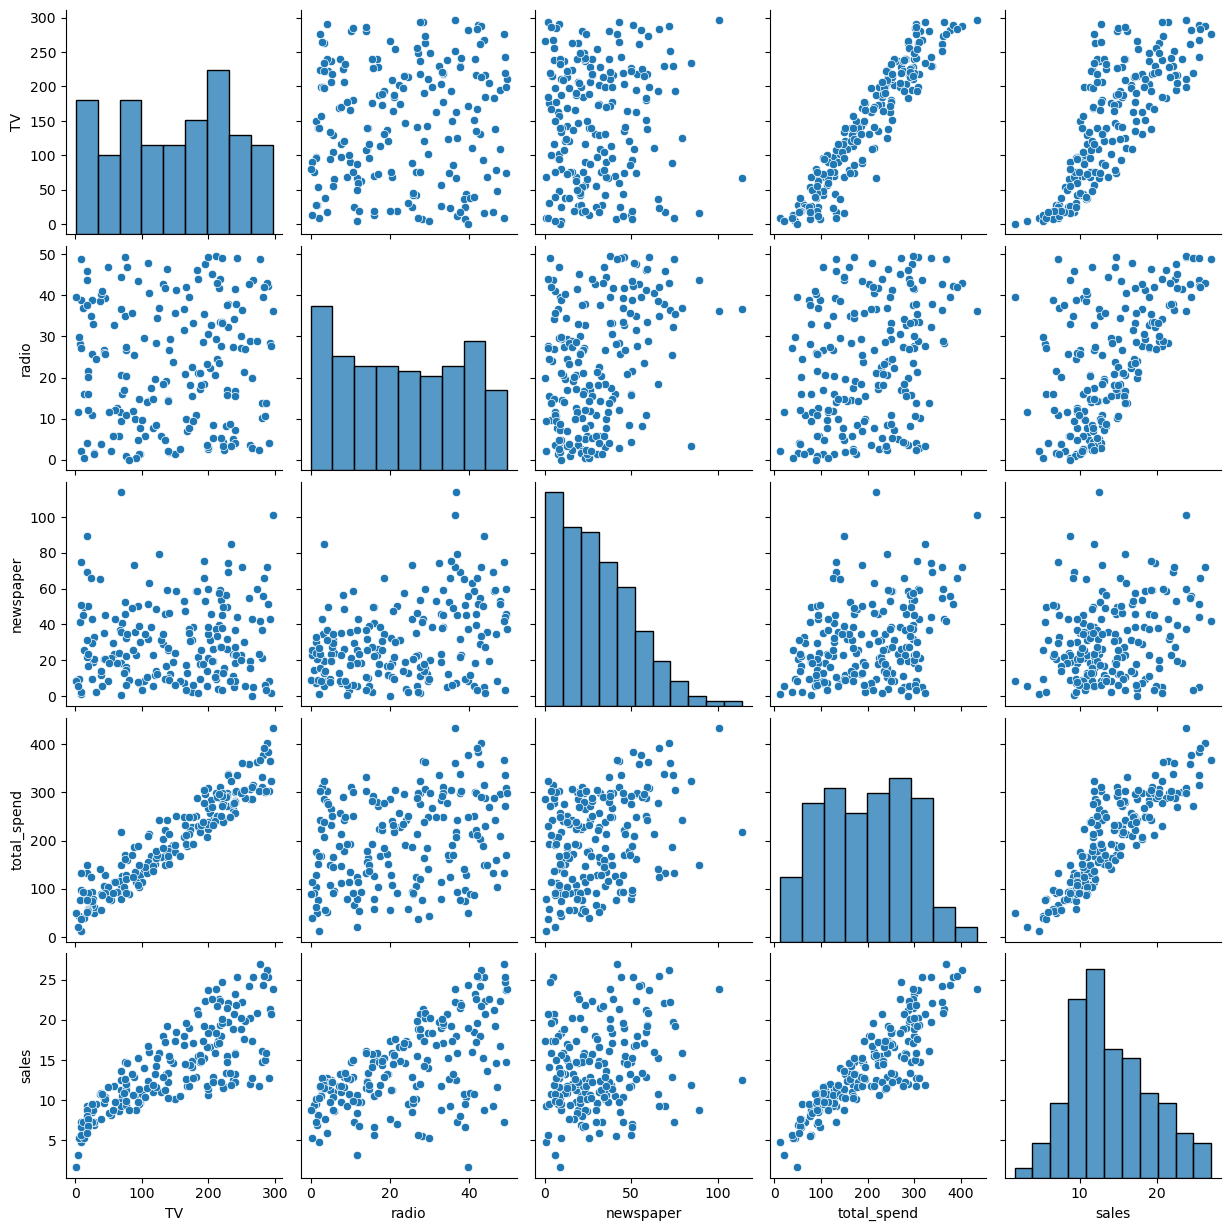

In [12]:
sns.pairplot(df);

In [13]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [14]:
import scipy.stats as stats

In [15]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<15}: {df.sales.corr(df[i])}")

corr between sales and TV             : 0.7822244248616061
corr between sales and radio          : 0.5762225745710551
corr between sales and newspaper      : 0.22829902637616528
corr between sales and total_spend    : 0.8677123027017427


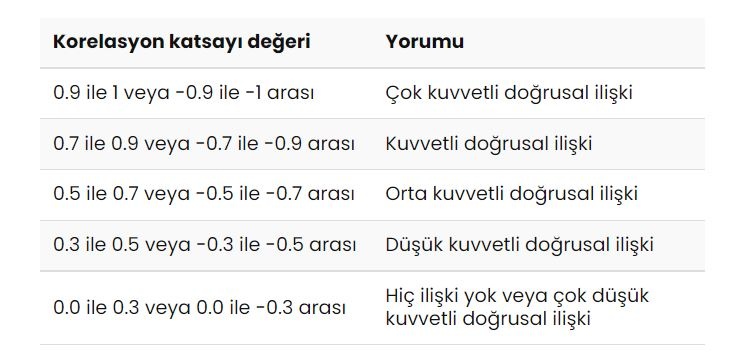

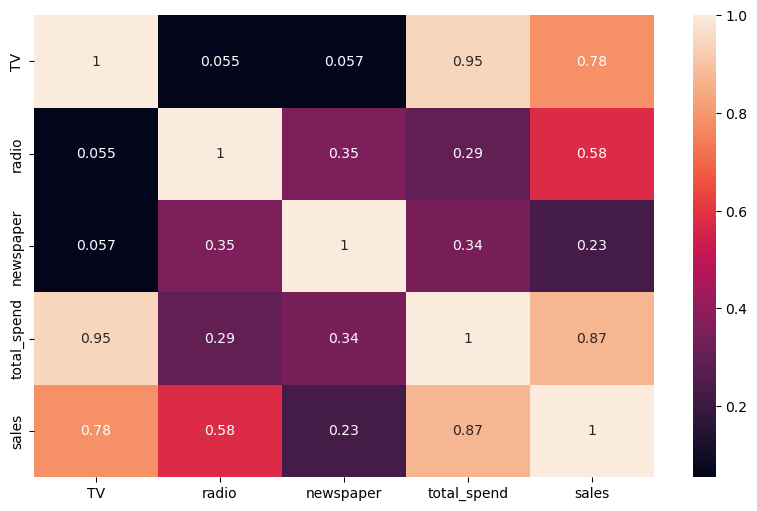

In [16]:
sns.heatmap(df.corr(), annot = True);

## Yeni Data Frame ile Devam ediyoruz

In [17]:
df = df[["total_spend", "sales"]]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


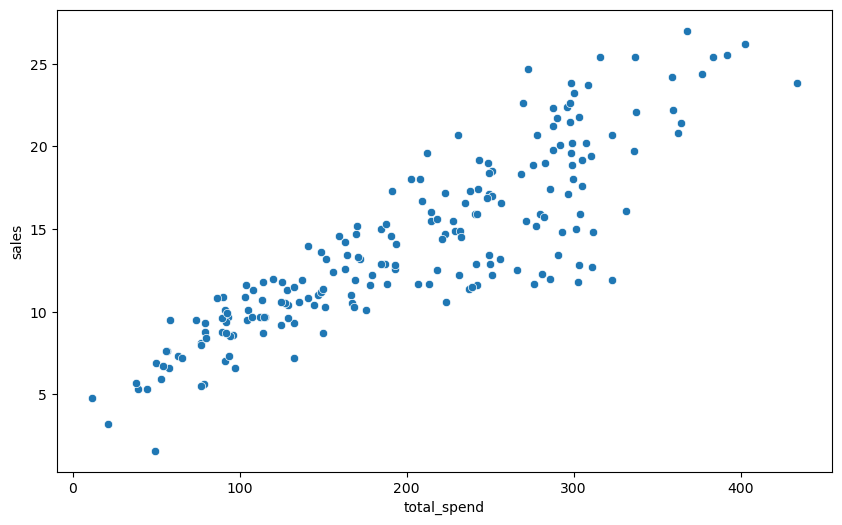

In [18]:
sns.scatterplot(x = "total_spend", y = "sales", data=df);

In [19]:
corr = df.sales.corr(df.total_spend)
corr

0.8677123027017427

In [20]:
df["total_spend"].corr(df["sales"])

0.8677123027017427

## Coefficant of Determination (R2)

In [21]:
R2_score = corr ** 2
R2_score

0.7529246402599608

## Linear Regression

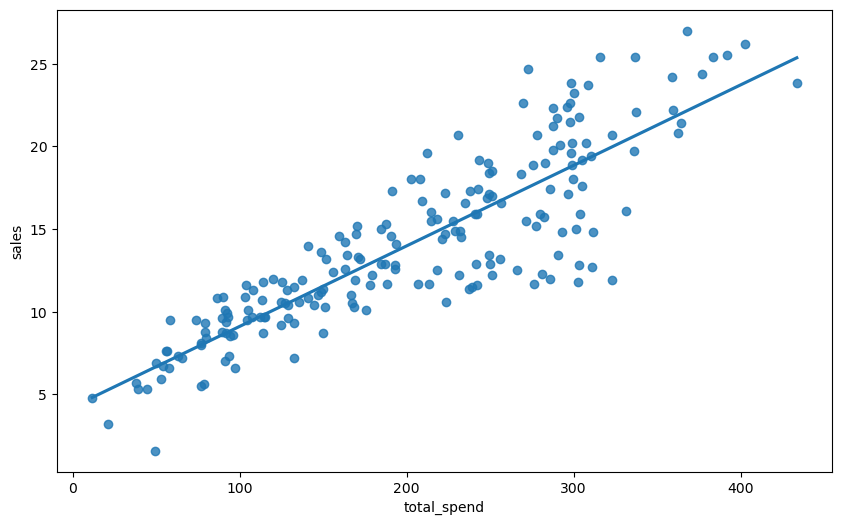

In [22]:
sns.regplot(x = "total_spend", y = "sales", data = df, ci=None);

y = b1 * X +b0

y = Target = Bağımlı değişken = dependent variable

b1 = Katsayı/eğim, slope cannot be zero, or infinity, can take any real value, for linear regression.

X = Feature(s), bağımsız değişken, independent variable

b0 = Intercept, otonom parametre, başlangıç parametresi

In [23]:
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


In [24]:
X = df["total_spend"] # Features
y = df["sales"]       # Target

In [25]:
np.polyfit(X, y, deg = 1)

array([0.04868788, 4.24302822])

## Determination of coefficients (slopes and intercept)

In [26]:
slope, intercept = np.polyfit(X, y, deg = 1)

In [27]:
print("slope     :", slope)
print("intercept :", intercept)

slope     : 0.048687879319048145
intercept : 4.2430282160363255


In [28]:
b1, b0 = np.polyfit(X, y, deg = 1)

In [29]:
print("b1 :", b1)
print("b0 :", b0)

b1 : 0.048687879319048145
b0 : 4.2430282160363255


In [30]:
y_pred = b1*X + b0
y_pred

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: total_spend, Length: 200, dtype: float64

y_predict = 0.048 * X + 4.24 çizginin değeri

y = 0.048 *X + 4.24 + ε (hata parametreleri toplamı gerçek değeri bulmak için = çizgiden gerçek değer arasındaki mesafenin değeri)residual errors

In [41]:
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


In [31]:
values = {"actual": y, "predicted": y_pred, "residual": y-y_pred, "LSE": (y-y_pred)**2}
df_2 = pd.DataFrame(values)
df_2
# residuals

,actual,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [32]:
df_2.residual.sum()

8.810729923425242e-13

In [33]:
df_2.residual.sum().round()

0.0

In [34]:
df_2.LSE

0       2.085967
1       0.014136
2       1.930164
3       4.087302
4      12.355211
         ...    
195     0.416098
196     0.056469
197     0.680926
198     4.757026
199     8.914914
Name: LSE, Length: 200, dtype: float64

In [35]:
df_2.LSE.sum() # we used this because the sum of residual is almost zero.

1338.4439761715594

## Prediction with simple linear regression

### Task

0 ile 500 arasında 100 adet eşit aralıklarla bölünmüş bir potential_spend datası oluşturalım ve bu dataya yönelik predicton alalım

In [36]:
potential_spend = np.linspace(0, 500, 100)
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [37]:
predicted_sales_lin = b1 * potential_spend + b0
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

In [38]:
b0

4.2430282160363255

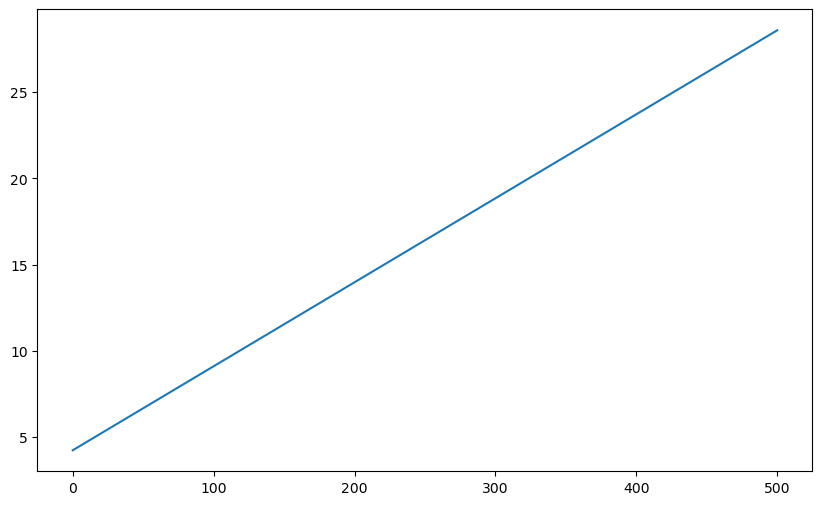

In [39]:
plt.plot(potential_spend, predicted_sales_lin);

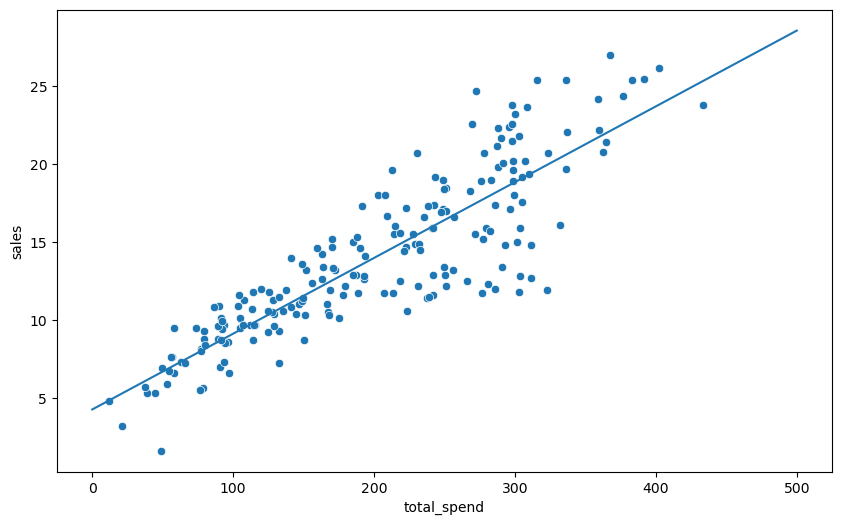

In [40]:
plt.plot(potential_spend, predicted_sales_lin)
sns.scatterplot(x = "total_spend", y = "sales", data = df);

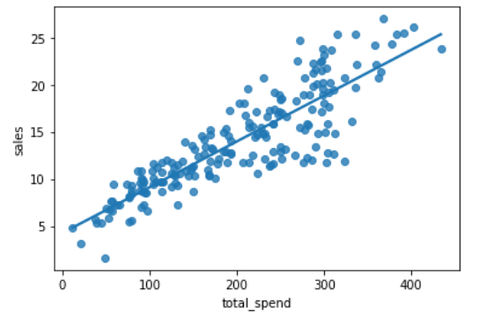